In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Y ban dau: ', y_train)
print('Y sau: ', Y_train)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'sigmoid'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
H = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 10, verbose = 1)

(50000, 28, 28)
Y ban dau:  [5 0 4 ... 8 4 8]
Y sau:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2986 - accuracy: 0.9146 - val_loss: 0.0689 - val_accuracy: 0.9810
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0615 - accuracy: 0.9820 - val_loss: 0.0569 - val_accuracy: 0.9839
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0389 - accuracy: 0.9885 - val_loss: 0.0477 - val_accuracy: 0.9861
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.0181 - accuracy: 0.9949 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 6/10
1563/1563 [==============================] - 39s 

{'loss': [0.29864346981048584, 0.06148285046219826, 0.038924019783735275, 0.027019042521715164, 0.018068751320242882, 0.0120672807097435, 0.007841130718588829, 0.006424362305551767, 0.0061639659106731415, 0.003756644669920206], 'accuracy': [0.9146199822425842, 0.9819999933242798, 0.9885200262069702, 0.9918599724769592, 0.9948599934577942, 0.9967799782752991, 0.9982399940490723, 0.9983999729156494, 0.9983400106430054, 0.9991199970245361], 'val_loss': [0.06888129562139511, 0.056869566440582275, 0.04771570861339569, 0.04470139741897583, 0.041762594133615494, 0.04189610853791237, 0.04889301583170891, 0.042484309524297714, 0.04336881637573242, 0.04675590619444847], 'val_accuracy': [0.9810000061988831, 0.9839000105857849, 0.9861000180244446, 0.9869999885559082, 0.9884999990463257, 0.9871000051498413, 0.9857000112533569, 0.988099992275238, 0.9889000058174133, 0.9879999756813049]}
[0.03543008118867874, 0.9890999794006348]


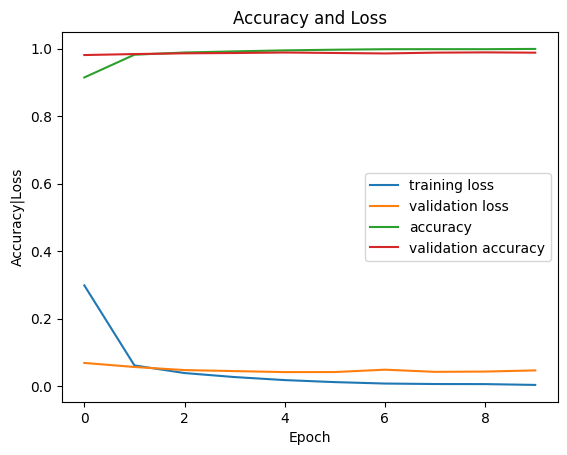

In [2]:
fig = plt.figure()
numOfEpoch = 10
print(H.history)
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label = 'training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label = 'accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy|Loss')
plt.legend()
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)

1/1 [==============================] - 0s 63ms/step
Gia tri du doan:  5


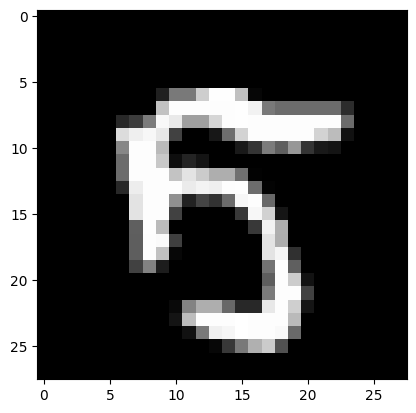

In [3]:
a = 2001

plt.imshow(X_test[a].reshape(28, 28), cmap = 'gray')
y_predict = model.predict(X_test[a].reshape(1, 28, 28, 1))
print('Gia tri du doan: ', np.argmax(y_predict))